In [57]:
import lab2a_func as l2af
import lab2a_func
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [58]:
import importlib
importlib.reload(lab2a_func)

<module 'lab2a_func' from '/home/andy/Work/AIM/Subjects/Term 2/Data Mining And Wrangling/Lab2A/lab2a_func.py'>

In [59]:
import sys
!{sys.executable} -m pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


Get the list of current S&P 500 companies

In [60]:
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())


  Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  


Download the historical price data (Adj Close) and construct the design matrix

In [61]:
year = 2019
filename = f'spx_{year}_adj_close.csv'
startdate = datetime.datetime(year,1,1)
df_spx = l2af.load_data(tickers, startdate, filename, force=False)
df_spx.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
2019-01-02 00:00:00,122.182991,39.310223,63.287033,69.330467,130.096802,224.570007,18.830000,11.957527,39.831776,63.278919,...,17.168501,16.219946,139.077789,98.979012,41.404736,62.223663,82.753342,156.240005,95.440033,81.243538
2019-01-03 00:00:00,117.582329,38.360683,60.300259,67.046112,125.655052,215.699997,17.049999,11.949095,38.825474,60.947735,...,17.750618,16.357407,136.160217,98.021446,41.241581,60.090603,80.671806,146.880005,93.713768,78.435387
2019-01-04 00:00:00,122.419693,39.898014,62.021309,69.206139,130.541016,226.190002,19.000000,12.345431,39.306747,63.057354,...,18.356661,17.037457,139.839737,101.974922,41.645153,62.625965,82.771423,152.970001,96.914375,81.512794
2019-01-07 00:00:00,122.138214,40.612415,62.950123,70.216232,130.994415,229.259995,20.570000,12.404459,39.516754,64.396332,...,18.723473,17.471533,140.871124,103.785736,41.464832,61.699749,82.680923,155.289993,96.951698,82.003273
2019-01-08 00:00:00,122.650101,41.607155,62.194317,70.542557,134.307205,232.679993,20.750000,12.691169,39.639267,65.340370,...,18.835110,17.992422,141.772369,107.037643,41.945694,62.279800,82.518013,156.330002,94.777527,83.224625


In [62]:

# Clean the data
df_spx = l2af.clean_data(df_spx)
# df_spx


Calculate for the returns matrix R and standardized returns Y

In [63]:

R, Y  = l2af.calculate_returns(df_spx)
# R.head()


Construct the correlation matrix

In [64]:
filename_corr = f'correlation_matrix_{year}.csv'
p = l2af.consrtuct_correlation_matrix(Y, filename_corr, force=True)
# p.dropna(inplace=True)
p.head()

,0,1,2,3,4,5,6,7,8,9,...,477,478,479,480,481,482,483,484,485,486
0,1.000000,0.440046,0.306346,0.256035,0.399254,0.283333,0.367229,0.283067,0.289037,0.375578,...,0.375423,0.425529,0.252811,0.426578,-0.104226,0.568389,0.148990,0.378220,0.252519,0.237772
1,0.440046,1.000000,0.264534,0.175564,0.286181,0.236434,0.286693,0.121876,0.265573,0.329350,...,0.387639,0.268116,0.246520,0.437219,-0.099379,0.505228,0.101536,0.428247,0.215628,0.249377
2,0.306346,0.264534,1.000000,0.343243,0.575872,0.527153,0.421387,0.297518,0.473156,0.566471,...,0.298569,0.255457,0.487259,0.285037,0.255363,0.399075,0.353707,0.343927,0.538920,0.536231
3,0.256035,0.175564,0.343243,1.000000,0.294027,0.334402,0.285619,0.269053,0.232417,0.316480,...,0.260961,0.239750,0.257208,0.285809,0.106524,0.241559,0.135781,0.259013,0.266996,0.180101
4,0.399254,0.286181,0.575872,0.294027,1.000000,0.604744,0.429356,0.379057,0.478898,0.510925,...,0.402549,0.355123,0.573171,0.354684,0.262695,0.481926,0.401731,0.354443,0.406692,0.499001


Calculate the Principal Components of the correlation matrix

In [65]:
p = np.float64(p)
# X_rotated.head()
w_prime, variance_explained, l = l2af.calculate_pca(p)

Plot of the eigenvalues vs explained variance

Text(0, 0.5, 'Eigenvalue')

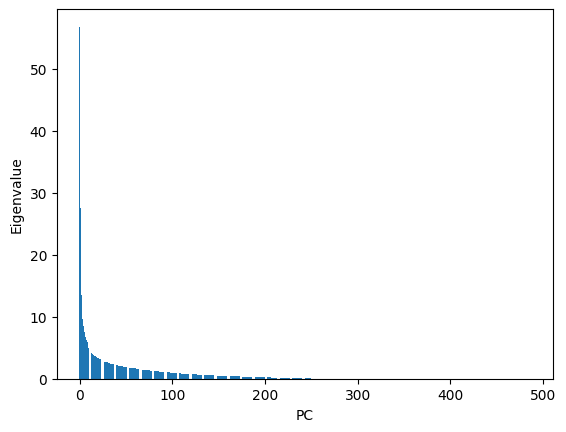

In [66]:
plt.bar(range(len(l)), l)
# plt.ylim(0,1)
plt.xlabel('PC')
plt.ylabel('Eigenvalue')

Plot the Density of States

Text(0.5, 0, 'Density Of States')

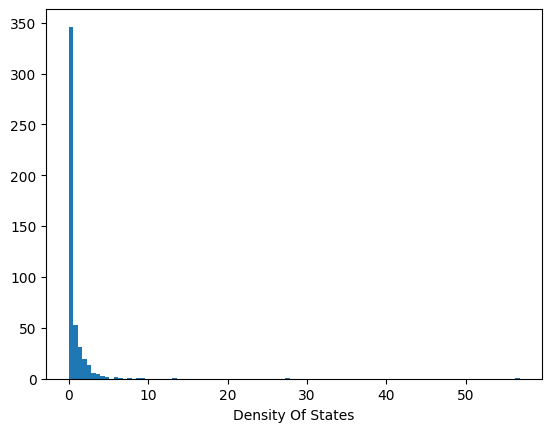

In [67]:
plt.hist(l, bins=100)
plt.xlabel('Density Of States')

Calculate the Eigenportfolio Returns

In [68]:
# F = pd.DataFrame(w_prime)
F = l2af.calculate_eigen_returns(w_prime, R)

Calculate SPX weighted returns

In [69]:
R_market = l2af.get_market_returns(startdate)

[*********************100%%**********************]  1 of 1 completed


2.772217695663011


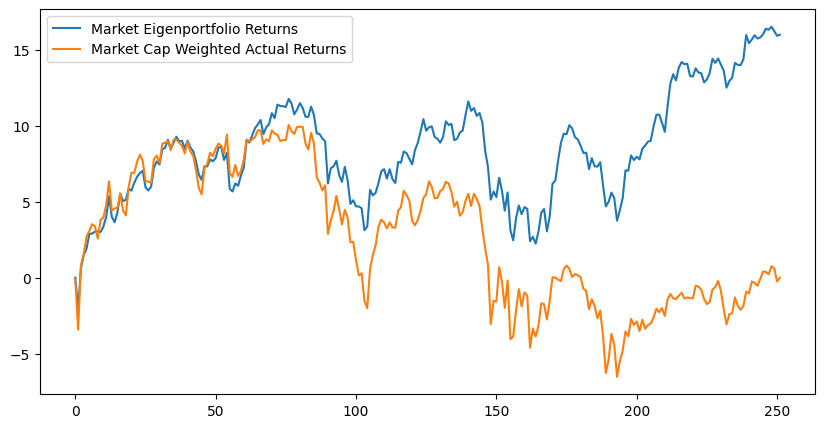

In [70]:
# RM = R.mean(axis=1)
print(max(np.abs(F[0].min()), np.abs(F[0].max())))
# data = F[0]/max(np.abs(F[0].min()), np.abs(F[0].max()))
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(F[0].cumsum(),  label="Market Eigenportfolio Returns")
ax.plot(R_market.cumsum(), label = "Market Cap Weighted Actual Returns")
plt.legend()

Plot the first Eigenvector

Top 10 Stocks
    Symbol                       Security             GICS Sector
57     BAC                Bank of America              Financials
71     BWA                     BorgWarner  Consumer Discretionary
112      C                      Citigroup              Financials
113    CFG       Citizens Financial Group              Financials
161    EMN       Eastman Chemical Company               Materials
170    EMR               Emerson Electric             Industrials
329     MS                 Morgan Stanley              Financials
364     PH                Parker Hannifin             Industrials
383    PRU           Prudential Financial              Financials
398     RF  Regions Financial Corporation              Financials

Bottom 10 Stocks
    Symbol                 Security  GICS Sector
17     LNT           Alliant Energy    Utilities
26     AEP  American Electric Power    Utilities
30     AWK     American Water Works    Utilities
116    CMS               CMS Energy    Utiliti

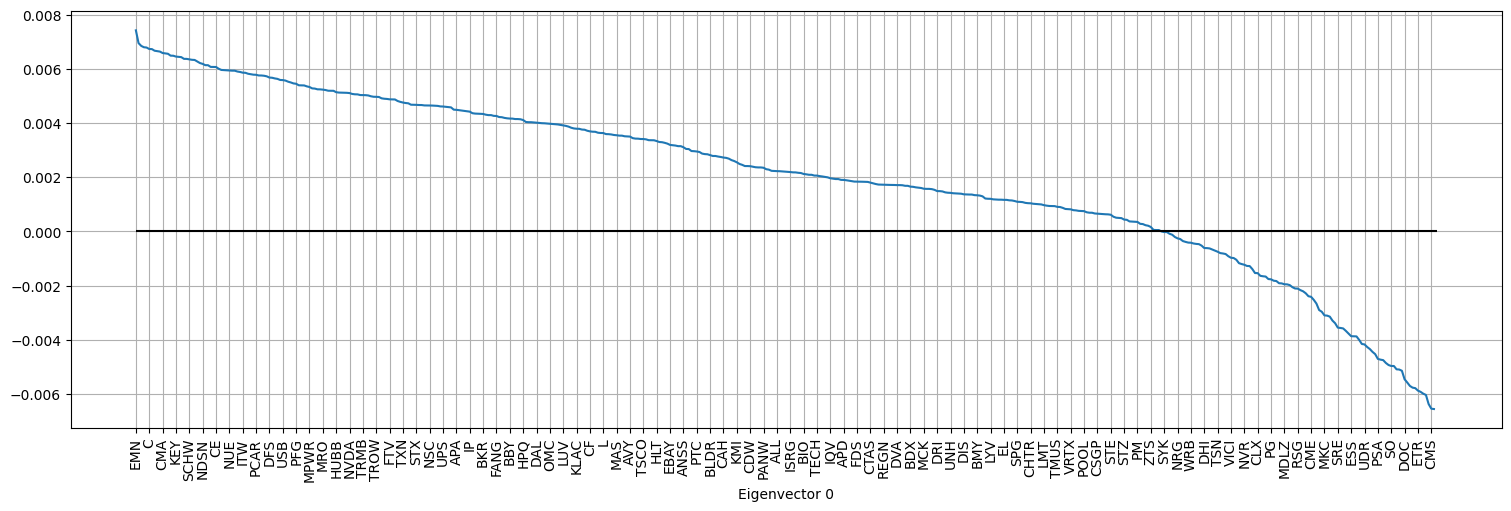

In [71]:
l2af.plot_eigenportfolio(w_prime, tickers, F, R, 0)

Plot Second Eigenvector

Top 10 Stocks
    Symbol                                Security             GICS Sector
4      ACN                               Accenture  Information Technology
45     AJG               Arthur J. Gallagher & Co.              Financials
50     ADP               Automatic Data Processing             Industrials
196    FIS  Fidelity National Information Services              Financials
306     MA                              Mastercard              Financials
365   PAYX                                 Paychex             Industrials
408   SPGI                              S&P Global              Financials
469   VRSN                                Verisign  Information Technology
470   VRSK                                  Verisk             Industrials
475      V                               Visa Inc.              Financials

Bottom 10 Stocks
    Symbol              Security GICS Sector
38     APA       APA Corporation      Energy
146    DVN          Devon Energy      Energy
148   FA

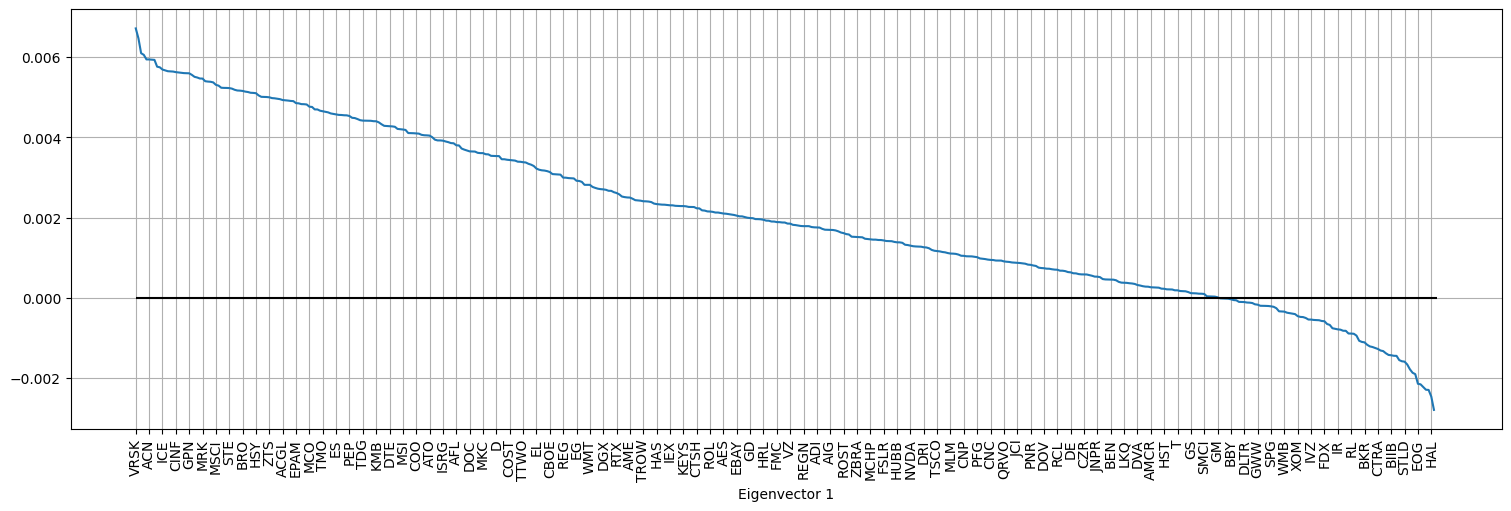

In [72]:
l2af.plot_eigenportfolio(w_prime, tickers, F, R, 1)

Plot Third Eigenvector

Top 10 Stocks
    Symbol                         Security       GICS Sector
24     AEE                           Ameren         Utilities
26     AEP          American Electric Power         Utilities
48     ATO                     Atmos Energy         Utilities
158    DTE                       DTE Energy         Utilities
159    DUK                      Duke Energy         Utilities
184     ES                       Eversource         Utilities
324    TAP    Molson Coors Beverage Company  Consumer Staples
374    PNW                    Pinnacle West         Utilities
384    PEG  Public Service Enterprise Group         Utilities
416    SPG             Simon Property Group       Real Estate

Bottom 10 Stocks
    Symbol      Security             GICS Sector
49    ADSK      Autodesk  Information Technology
142    DAY      Dayforce             Industrials
147   DXCM        Dexcom             Health Care
174   EPAM  EPAM Systems  Information Technology
192   FICO    Fair Isaac  Information Tec

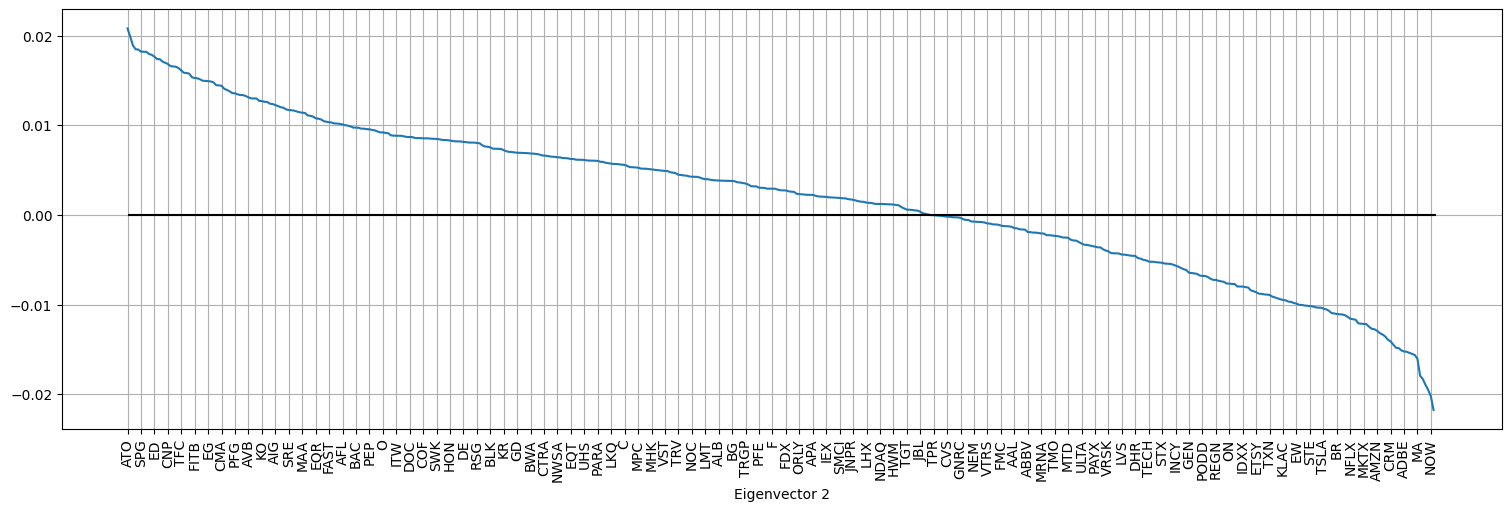

In [73]:
l2af.plot_eigenportfolio(w_prime, tickers, F, R, 2)

Repeat the PCA on data right after the data we used

The Differences between the Market Eigenportfolio and Actual Market returns may be attributed to the changes in the Actual SPX's composition and allocation weights over time, whereas the Eigenportfolio takes into consideration the current composition.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


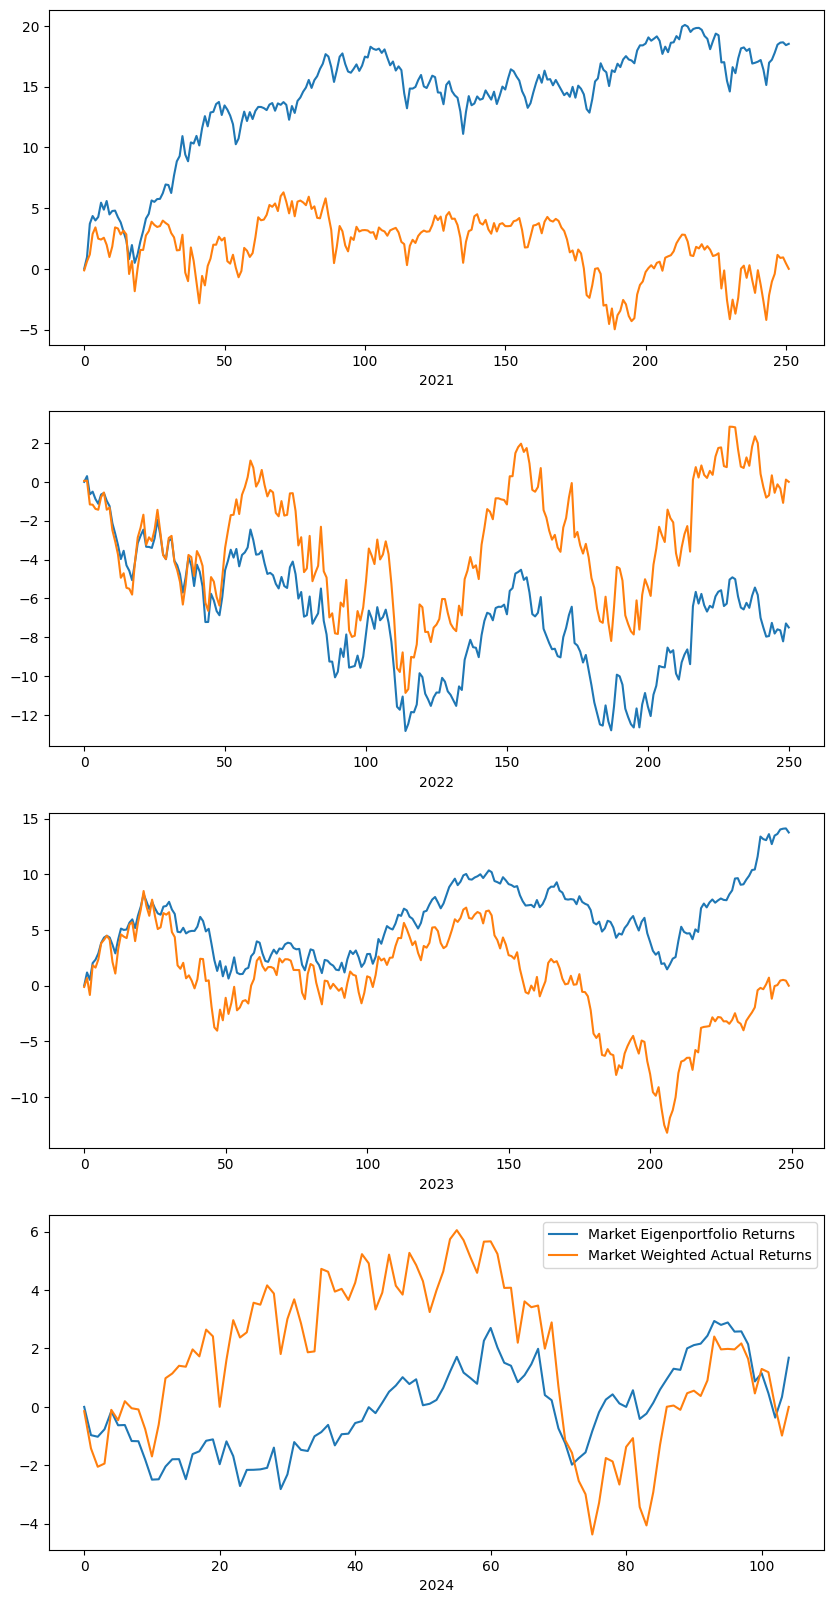

In [74]:
#Check fof 2020-2024
start = 2020
fig, ax = plt.subplots(4, figsize=(10,20))
for i in range(4):
    start += 1
    filename = f'spx_{start}_adj_close.csv'
    startdate = datetime.datetime(start,1,1)
    df_spx = l2af.load_data(tickers, startdate, filename, force=False)
    df_spx = l2af.clean_data(df_spx)
    R, Y = l2af.calculate_returns(df_spx)
    filename_corr = f'correlation_matrix_{start}.csv'
    p = l2af.consrtuct_correlation_matrix(Y, filename_corr, force=False)
    w_prime, variance_explained, l = l2af.calculate_pca(p)
    F = l2af.calculate_eigen_returns(w_prime, R)
    R_market = l2af.get_market_returns(startdate)
    l2af.plot_returns(start, F, R_market, ax[i])
    # plot_eigen_returns(F, ax[i][1])
plt.legend()

Check if the Eigenportfolio returns are uncorrelated:

Visual Inspection of returns for the 1st 5 eigenportfolios

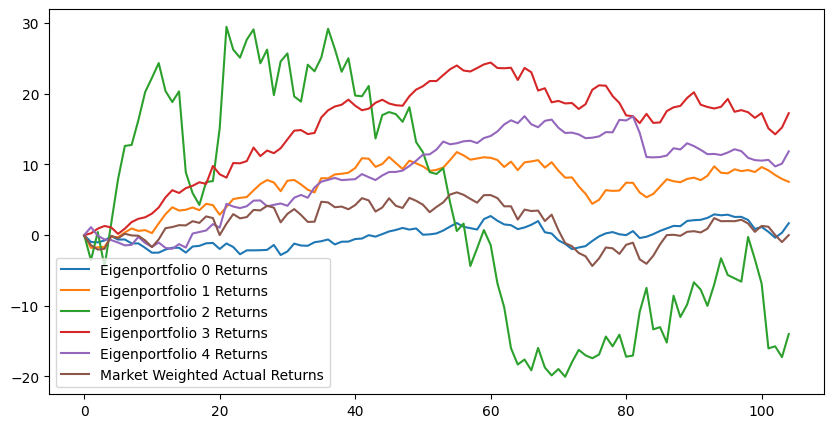

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i in range(5):
    ax.plot(F[i].cumsum(),  label=f"Eigenportfolio {i} Returns")
ax.plot(R_market.cumsum(), label = "Market Weighted Actual Returns")
plt.legend()

Do Hypothesis Testing<br>
Null Hypothesis (H₀): The datasets are not correlated (correlation coefficient = 0).<br>
Alternative Hypothesis (H₁): The datasets are correlated (correlation coefficient ≠ 0).

In [76]:
from scipy.stats import pearsonr, spearmanr, kendalltau
from itertools import combinations

alpha = 0.05
p_values = {}

comb = combinations(range(len(F)), 2)
for ctr, i in enumerate(comb):
        # Pearson Correlation
        pearson_corr, pearson_p_value = pearsonr(F[i[0]].to_numpy(), F[i[1]].to_numpy())
        p_values[f'{i[0]}-{i[1]}'] = pearson_p_value 
        if ctr % 100 == 0:
            print(f'\nFor Eigenportfolio {i[0]} and {i[1]}:')
            # Interpretation
            if pearson_p_value > alpha:
                print("Pearson correlation: No significant correlation")
            else:
                print("Pearson correlation: Significant correlation")





For Eigenportfolio 0 and 1:
Pearson correlation: Significant correlation

For Eigenportfolio 0 and 101:
Pearson correlation: No significant correlation

For Eigenportfolio 1 and 98:
Pearson correlation: No significant correlation

For Eigenportfolio 2 and 96:
Pearson correlation: No significant correlation

For Eigenportfolio 3 and 95:
Pearson correlation: No significant correlation

For Eigenportfolio 4 and 95:
Pearson correlation: No significant correlation

For Eigenportfolio 5 and 96:
Pearson correlation: No significant correlation

For Eigenportfolio 6 and 98:
Pearson correlation: No significant correlation

For Eigenportfolio 7 and 101:
Pearson correlation: No significant correlation

For Eigenportfolio 9 and 10:
Pearson correlation: No significant correlation

For Eigenportfolio 10 and 16:
Pearson correlation: No significant correlation

For Eigenportfolio 11 and 23:
Pearson correlation: No significant correlation

For Eigenportfolio 12 and 31:
Pearson correlation: No significa

Do Holm's Step-Down Procedure

In [77]:
df_stat=pd.DataFrame()
df_stat['Eigenportfolio pair']=p_values.keys()
df_stat['p_value']=p_values.values()
alpha = 0.05
df_stat.sort_values(by='p_value', inplace=True) # Sort in place!
df_stat['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
# Reject Null Hypothesis = Correlated
df_stat['correlated'] = df_stat['p_value'] < df_stat['L_thresholds']
df_stat.reset_index(drop=True, inplace=True)
print(df_stat)
correlated = max(df_stat.loc[df_stat['correlated'] == True].index +1)
not_correlated = len(df_stat.index) - correlated
print(f'\nNot Correlated: {not_correlated/(correlated+not_correlated) * 100}%')

     Eigenportfolio pair   p_value  L_thresholds  correlated
0                101-104  0.000002      0.000009        True
1                  0-104  0.000028      0.000009       False
2                    0-1  0.000057      0.000009       False
3                103-104  0.000629      0.000009       False
4                102-104  0.000692      0.000009       False
...                  ...       ...           ...         ...
5455               29-99  0.999926      0.010000       False
5456               55-94  0.999930      0.012500       False
5457               94-97  0.999946      0.016667       False
5458               29-97  0.999952      0.025000       False
5459               29-94  0.999957      0.050000       False

[5460 rows x 4 columns]

Not Correlated: 99.98168498168498%


For the 1st 5 Eigenportfolios, 99.98% show no statistically significant correlation on returns.